In [11]:
from fmp_python.fmp import FMP
import pandas as pd
import numpy as np
from datetime import datetime
from dotenv import load_dotenv
import os

load_dotenv()
FMP_API_KEY = os.getenv("FMP_API_KEY")
fmp = FMP(output_format='pandas',api_key=FMP_API_KEY)

In [13]:
#Access & Download financial data
microsoftData = fmp.get_historical_price("MSFT")

In [14]:
# Date and label are similar (label just uses month name instead of month number)
# 1256 unique dates roughly 5 years of data (251 trading days)
# Date is ordered, recent to old
# Date contains strings (Dtype is object)
# Volumes (unadjusted as well) is an int
# Change is % change but backwards? 
microsoftData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1256 non-null   object 
 1   open              1256 non-null   float64
 2   high              1256 non-null   float64
 3   low               1256 non-null   float64
 4   close             1256 non-null   float64
 5   adjClose          1256 non-null   float64
 6   volume            1256 non-null   int64  
 7   unadjustedVolume  1256 non-null   int64  
 8   change            1256 non-null   float64
 9   changePercent     1256 non-null   float64
 10  vwap              1256 non-null   float64
 11  label             1256 non-null   object 
 12  changeOverTime    1256 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 127.7+ KB


In [4]:
# Update strings to datetime for ordering purposes
microsoftData['date'] = pd.to_datetime(microsoftData['date'])

In [5]:
# Reorder to go from 2020 to 2025
microsoftData = microsoftData.sort_values(by=['date'])

In [6]:
# Update the chnage column to represent the forward pct_change rather than the backward
microsoftData['change'] = microsoftData['close'].pct_change()

In [22]:
# Calculate and add log return to the dataFrame 
microsoftData['log_return'] = np.log(microsoftData['close']/microsoftData['close'].shift(periods=1))

<Axes: xlabel='date'>

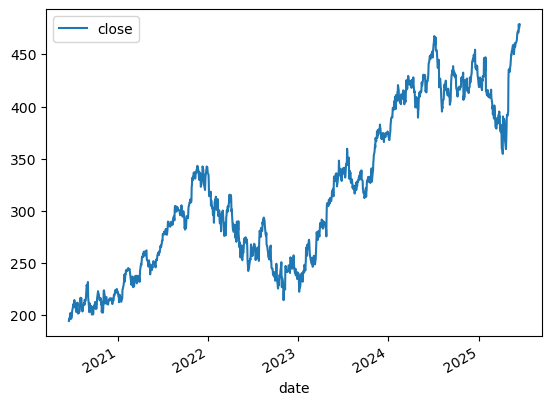

In [26]:
#Line Plot of Close Price Time Series (full 5 years)
microsoftData.plot(x='date',y='close')

<Axes: ylabel='Frequency'>

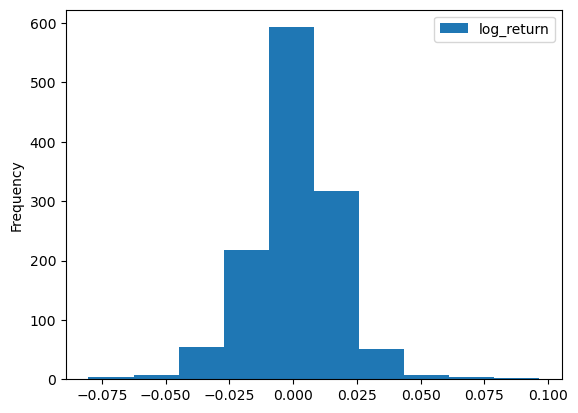

In [ ]:
#Corresponding daily log return distribution. Appears ever so slightly skew left as expected
microsoftData.plot(y='log_return',kind='hist')

In [28]:
# Calculate the cumulative return on an investment and assign it to the dataFrame
microsoftData['cumulative_returns'] = (microsoftData['change'].fillna(0)+1).cumprod() - 1
microsoftData['cumulative_log_return'] = microsoftData['log_return'].fillna(0).cumsum()

<Axes: xlabel='date'>

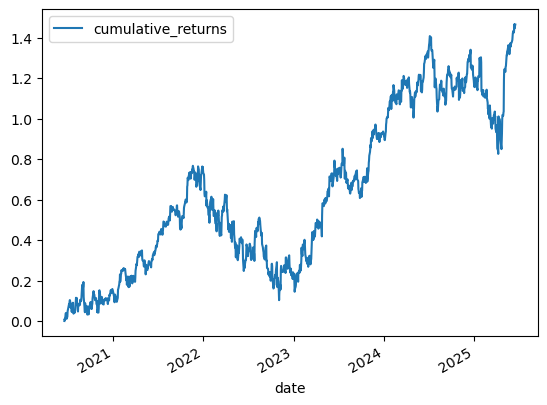

In [ ]:
# Corresponding time series of cumulative return
microsoftData.plot(x='date',y='cumulative_returns')

<Axes: xlabel='date'>

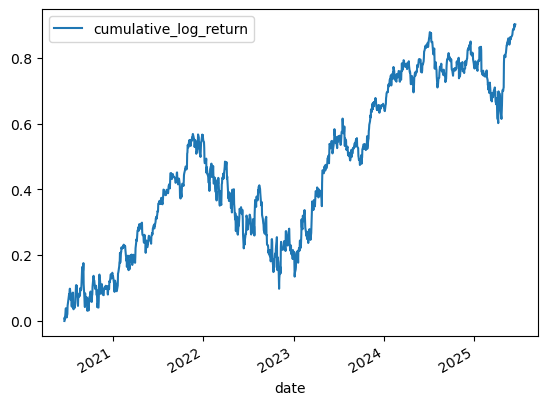

In [29]:
# Corresponding time series of cumulative log return
microsoftData.plot(x='date',y='cumulative_log_return')

In [ ]:
# See structure by focusing on the 2023 calendar year. Use .loc[] to select rows based on their datetime
singleYearData = microsoftData.loc[(microsoftData['date'] >= datetime(2023, 1, 1)) & (microsoftData['date'] < datetime(2024, 1,1))]

<Axes: xlabel='date'>

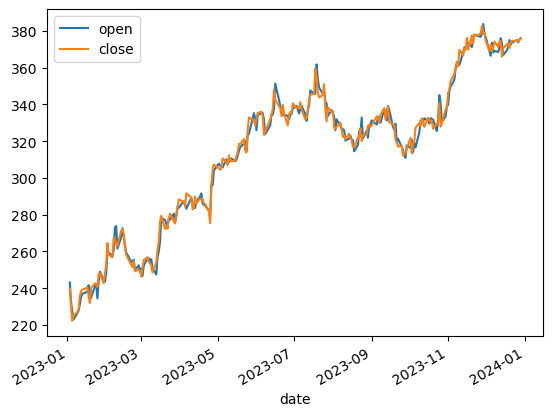

In [ ]:
# Single Year (2023) time series of open and close prices
singleYearData.plot(x='date',y=['open','close'])

<Axes: ylabel='Frequency'>

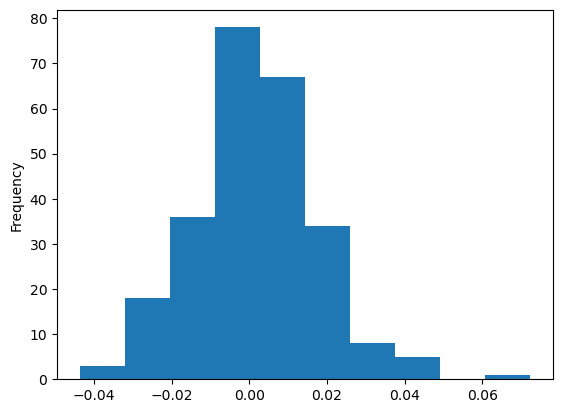

In [ ]:
# Corresponding daily returns histogram
singleYearData['change'].plot(kind='hist')

In [ ]:
# Single Year Summary Statistics
singleYearData[['close','change','log_return']].describe()

,close,change,log_return
count,250.000000,250.000000,250.000000
mean,313.951000,0.001925,0.000781
std,40.975858,0.015801,0.006832
min,222.310000,-0.043743,-0.019425
25%,282.995000,-0.007556,-0.003294
50%,324.650000,0.001654,0.000718
75%,337.897500,0.011159,0.004820
max,382.700000,0.072435,0.030371
